In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [148]:
data1 = pd.read_csv(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\Train.csv')
data2 = pd.read_excel(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\Events_HolidaysData.xlsx')
data3 = pd.read_excel(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\MacroEconomicData.xlsx')
data4 = pd.ExcelFile(r'C:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\data\WeatherData.xlsx')

In [149]:
data2 = data2[data2['Year'] < 2016]

In [150]:
data3 = data3.iloc[:84]

In [151]:
Weather_Data_list = []
for i in range(0,len(data4.sheet_names)):
    Weather_Data_list.append(data4.parse(data4.sheet_names[i])) 
    
    Weather_Data_list[i].Year = data4.sheet_names[i]
Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"] = Weather_Data_list[5].loc[:,"Temp high (°C)":"WeatherEvent"]\
.shift(-1)
Weather_Data_list[5] = Weather_Data_list[5][:-1].copy()
data5 = pd.DataFrame()
for df in Weather_Data_list:
    data5 = pd.concat([data5,df])

In [152]:
data1['Date'] = data1.Year.astype(str).str.cat(data1.Month.astype(str), sep='-')
data1['Date'] = pd.to_datetime(data1.Date.astype(str) + "-1")
data1.set_index('Date', inplace = True)
data1.drop(["Year","Month"],axis =1, inplace=True)

In [153]:
data2.MonthDate = data2.MonthDate.astype(str).str[2:7]

In [154]:
data2['Date'] = pd.to_datetime(data2.Year.astype(str).str.cat(data2.MonthDate.astype(str), sep='-'), format='%Y-%d-%m')
data2.drop(["Year","MonthDate"],axis =1, inplace=True)
data2.set_index('Date', inplace = True)

In [155]:
data3.rename(columns = {'Year-Month':'Date'}, inplace = True)
data3['Date'] = pd.to_datetime(data3.Date.astype(str) + "-1")
data3.set_index('Date', inplace = True)

In [156]:
data5['Date'] = pd.to_datetime(data5.Year.astype(str).str.cat(data5.Month.astype(str), sep='-')\
                                      .str.cat(data5.Day.astype(str), sep='/'))
data5.drop(["Year","Month","Day"],axis =1, inplace=True)
data5.set_index('Date', inplace = True)

In [157]:
data1.isnull().sum()

ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

In [158]:
data1.isnull().mean()

ProductCategory              0.000000
Sales(In ThousandDollars)    0.051587
dtype: float64

In [159]:
data1mean=data1["Sales(In ThousandDollars)"].mean()

In [160]:
data1["Sales(In ThousandDollars)"]=data1["Sales(In ThousandDollars)"].fillna(data1mean)

In [161]:
data1.isnull().sum()

ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64

In [162]:
data2.isnull().sum()

Event          0
DayCategory    0
dtype: int64

In [163]:
dData2=pd.get_dummies(data2['DayCategory'])

In [164]:
data2=dData2

In [165]:
data2 = data2.resample('M').sum()

In [166]:
data3.drop('PartyInPower', axis=1,inplace=True)

In [167]:
data3.drop('AdvertisingExpenses (in Thousand Dollars)', axis=1,inplace=True)

In [168]:
data5[data5.columns[18]] = data5[data5.columns[18]].apply(lambda x: 0.01 if x == 'T' else x)

In [169]:
data5 = data5.applymap(lambda x: np.nan if x == '-' else x)

In [170]:
data5.WeatherEvent.fillna(value="NotApplicable", inplace=True)
data5 = data5[~data5["Temp high (°C)"].isnull()]

In [171]:
data5 = data5.dropna()

In [172]:
data5.isnull().sum()

Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

In [173]:
data5.drop(['WeatherEvent'],axis=1,inplace=True)

In [174]:
data5_mean = data5.resample('M').mean()

In [175]:
data5_mean=data5_mean.drop( ['Temp high (°C)','Temp low (°C)','Dew Point high (°C)','Dew Point low (°C)', 'Humidity (%) high','Humidity (%) low', 'Sea Level Press. (hPa) high', 'Sea Level Press. (hPa) low','Visibility (km) high','Visibility (km) low', 'Wind (km/h) low','Wind (km/h) high'],axis = 1)

In [176]:
data1_mean = data1.select_dtypes(include='number').resample('ME').mean()

In [177]:
data1.shape

(252, 2)

In [178]:
data2.shape

(84, 2)

In [179]:
data3.shape

(84, 15)

In [180]:
data5.shape

(2496, 19)

In [181]:
data2.index = data3.index
data5_mean.index = data3.index
data1_mean.index = data3.index

In [182]:
data_final = data3.join(data5_mean)
data_final = data_final.join(data2)

In [183]:
data_final = data_final.join(data1_mean)

In [184]:
list(data_final.columns)

['Monthly Nominal GDP Index (inMillion$)',
 'Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'Temp avg (°C)',
 'Dew Point avg (°C)',
 'Humidity\xa0(%) avg',
 'Sea Level Press.\xa0(hPa) avg',
 'Visibility\xa0(km) avg',
 'Wind\xa0(km/h) avg',
 'Precip.\xa0(mm) sum',
 'Event',
 'Federal Holiday',
 'Sales(In ThousandDollars)']

In [185]:
data_final=data_final.drop(['Monthly Nominal GDP Index (inMillion$)','Monthly Real GDP Index (inMillion$)','CPI','unemployment rate','CommercialBankInterestRateonCreditCardPlans','Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan','Earnings or wages  in dollars per hour'], axis='columns')

In [186]:
data_final=data_final.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Change(in%)','Average upland planted(million acres)','Average upland harvested(million acres)','yieldperharvested acre','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)','Exports','Temp avg (°C)','Dew Point avg (°C)','Humidity\xa0(%) avg','Sea Level Press.\xa0(hPa) avg','Visibility\xa0(km) avg','Wind\xa0(km/h) avg','Precip.\xa0(mm) sum','Event','Federal Holiday'],axis='columns')

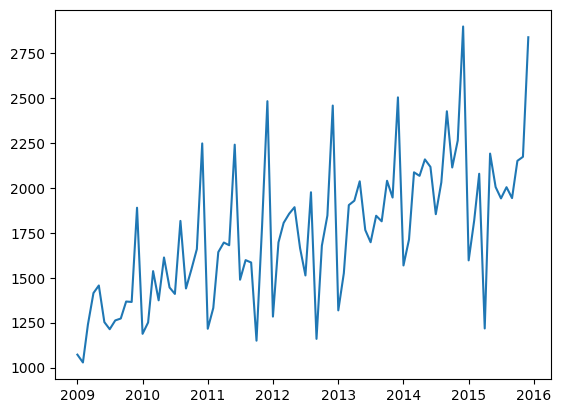

In [187]:
plt.plot(data_final['Sales(In ThousandDollars)'])

In [188]:
data_final.tail(5)

,Sales(In ThousandDollars)
Date,
2015-08-01,2004.666667
2015-09-01,1944.000000
2015-10-01,2151.666667
2015-11-01,2174.000000
2015-12-01,2840.333333


In [46]:
list(data_final.columns)

['Sales(In ThousandDollars)']

## Moving average model

#### checking if data is stationary

In [47]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(data_final['Sales(In ThousandDollars)'])   
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5014707408358243
p-value: 0.5327836593853664


In [48]:
Sales_diff = np.diff(data_final['Sales(In ThousandDollars)'], n=1)

In [49]:
ADF_result = adfuller(Sales_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.426841812971268
p-value: 1.7360801011301046e-08


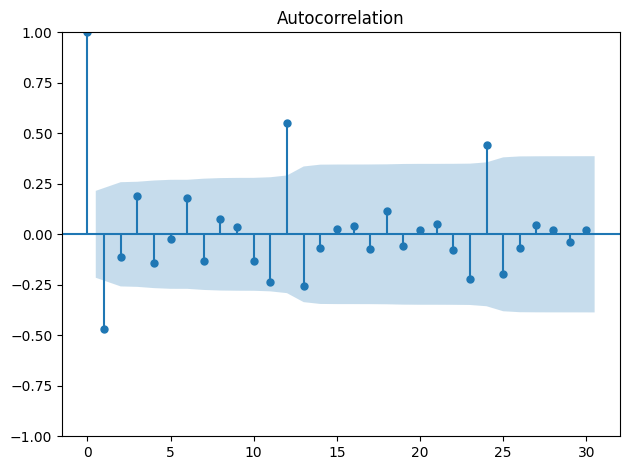

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Sales_diff, lags=30);
plt.tight_layout()

##### splitting data into train and test

In [51]:
train_len = 60
train = data_final[0:train_len] 
test = data_final[train_len:]

In [52]:
## simple moving average model
y_hat_sma = data_final.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data_final['Sales(In ThousandDollars)'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

C:\Users\A.Akshita\AppData\Local\Temp\ipykernel_37596\2599609139.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
C:\Users\A.Akshita\AppData\Local\Temp\ipykernel_37596\2599609139.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "c

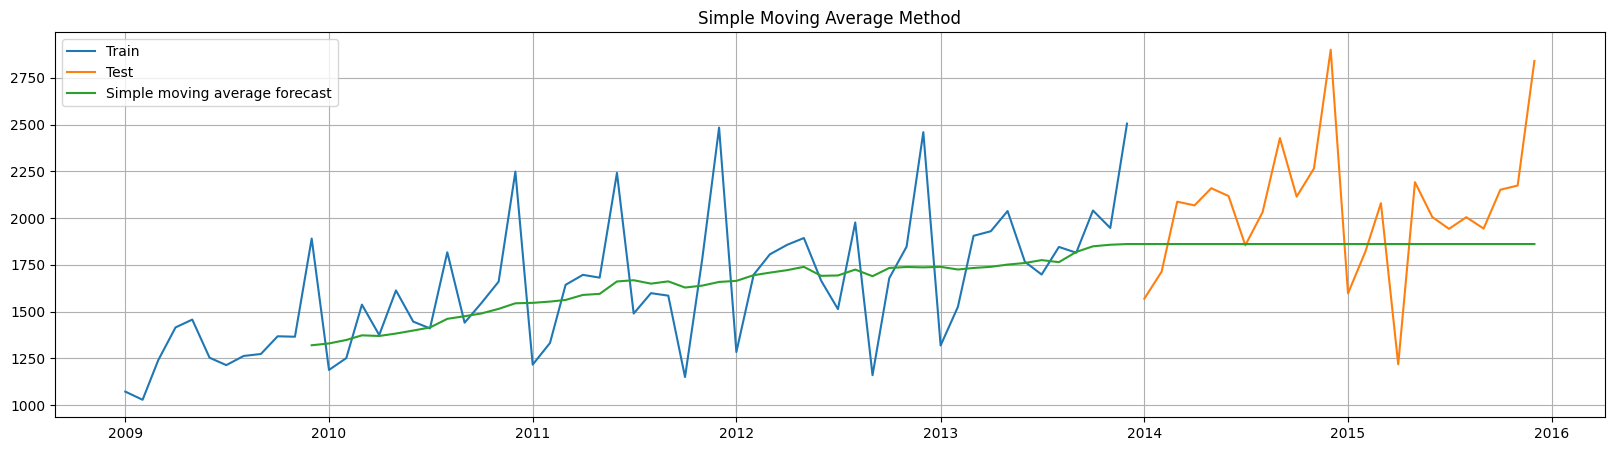

In [53]:
##plotting
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Sales(In ThousandDollars)'], label='Train')
plt.plot(test['Sales(In ThousandDollars)'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [54]:
y_hat_sma

,Sales(In ThousandDollars),sma_forecast
Date,,
2009-01-01,1071.666667,NaN
2009-02-01,1028.000000,NaN
2009-03-01,1239.666667,NaN
2009-04-01,1415.000000,NaN
2009-05-01,1457.000000,NaN
...,...,...
2015-08-01,2004.666667,1861.127848
2015-09-01,1944.000000,1861.127848
2015-10-01,2151.666667,1861.127848


In [55]:
y_hat_sma=y_hat_sma[60:]

In [56]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Check MAE value
performance_MAE = mean_absolute_error(test['Sales(In ThousandDollars)'], y_hat_sma['sma_forecast'])
print(f'The MAE for the model is {performance_MAE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(test['Sales(In ThousandDollars)'], y_hat_sma['sma_forecast'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 308.50000000000006
The MAPE for the model is 0.14763840951694387


In [57]:
data_final['Date'] = data_final.index

## WMA

In [58]:
import matplotlib as mpl

In [59]:
##initialising weights
weights = np.arange(1,31)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [60]:
## calculating wma for 30 days
wma30 = data_final['Sales(In ThousandDollars)'].rolling(30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma30.head(20)

Date
2009-01-01   NaN
2009-02-01   NaN
2009-03-01   NaN
2009-04-01   NaN
2009-05-01   NaN
2009-06-01   NaN
2009-07-01   NaN
2009-08-01   NaN
2009-09-01   NaN
2009-10-01   NaN
2009-11-01   NaN
2009-12-01   NaN
2010-01-01   NaN
2010-02-01   NaN
2010-03-01   NaN
2010-04-01   NaN
2010-05-01   NaN
2010-06-01   NaN
2010-07-01   NaN
2010-08-01   NaN
Name: Sales(In ThousandDollars), dtype: float64

In [61]:
data_final['Our 30-day WMA'] = np.round(wma30, decimals=3)
data_final[['Sales(In ThousandDollars)', 'Our 30-day WMA']].head

<bound method NDFrame.head of             Sales(In ThousandDollars)  Our 30-day WMA
Date                                                 
2009-01-01                1071.666667             NaN
2009-02-01                1028.000000             NaN
2009-03-01                1239.666667             NaN
2009-04-01                1415.000000             NaN
2009-05-01                1457.000000             NaN
...                               ...             ...
2015-08-01                2004.666667        2008.715
2015-09-01                1944.000000        2005.838
2015-10-01                2151.666667        2016.275
2015-11-01                2174.000000        2027.676
2015-12-01                2840.333333        2081.772

[84 rows x 2 columns]>

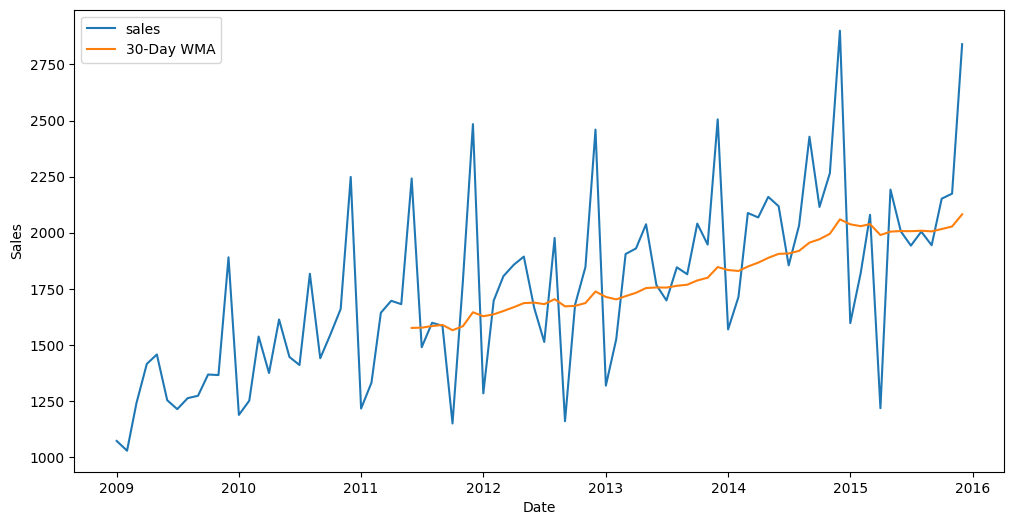

In [62]:
#plotting
plt.figure(figsize = (12,6))
plt.plot(data_final['Sales(In ThousandDollars)'], label="sales")
plt.plot(wma30, label="30-Day WMA")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [63]:
test_data=data_final[60:]

In [64]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Check MAE value
performance_MAE = mean_absolute_error(test_data['Sales(In ThousandDollars)'], test_data['Our 30-day WMA'])
print(f'The MAE for the model is {performance_MAE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(test_data['Sales(In ThousandDollars)'], test_data['Our 30-day WMA'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 250.87245153417018
The MAPE for the model is 0.1260697247551922


In [65]:
data_final

,Sales(In ThousandDollars),Date,Our 30-day WMA
Date,,,
2009-01-01,1071.666667,2009-01-01,NaN
2009-02-01,1028.000000,2009-02-01,NaN
2009-03-01,1239.666667,2009-03-01,NaN
2009-04-01,1415.000000,2009-04-01,NaN
2009-05-01,1457.000000,2009-05-01,NaN
...,...,...,...
2015-08-01,2004.666667,2015-08-01,2008.715
2015-09-01,1944.000000,2015-09-01,2005.838
2015-10-01,2151.666667,2015-10-01,2016.275


## ARIMA

In [89]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

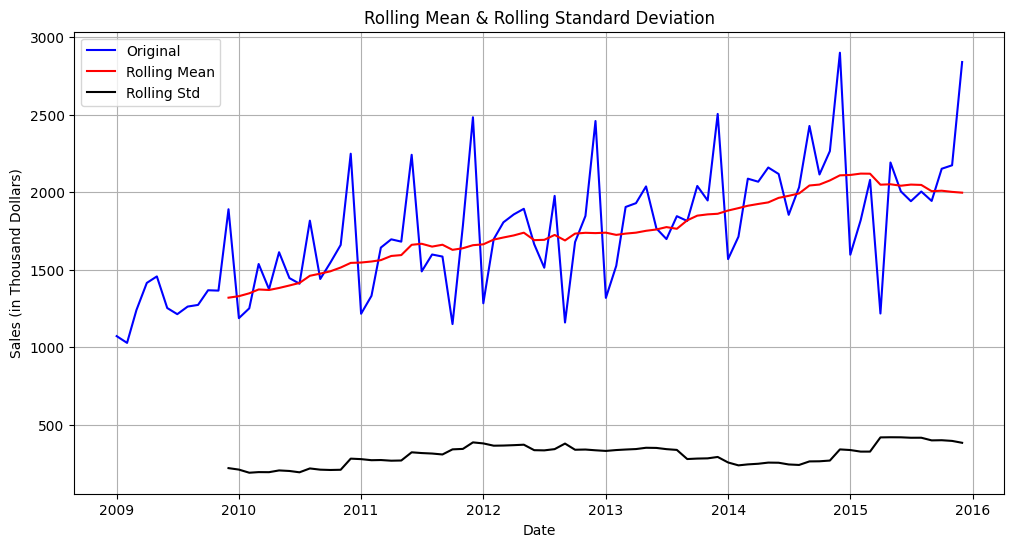

In [81]:
##checking whether time series is stationary or not
sales_series = data_final["Sales(In ThousandDollars)"]

# Rolling stats (12-month window)
rolling_mean = sales_series.rolling(window=12).mean()
rolling_std = sales_series.rolling(window=12).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_series, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.title('Rolling Mean & Rolling Standard Deviation')
plt.xlabel("Date")
plt.ylabel("Sales (in Thousand Dollars)")
plt.grid()
plt.show()

In [78]:
## findinf adf and p value
result = adfuller(data_final['Sales(In ThousandDollars)'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.5014707408358243
p-value: 0.5327836593853664
Critical Values:
	1%: -3.524624466842421
	5%: -2.9026070739026064
	10%: -2.5886785262345677


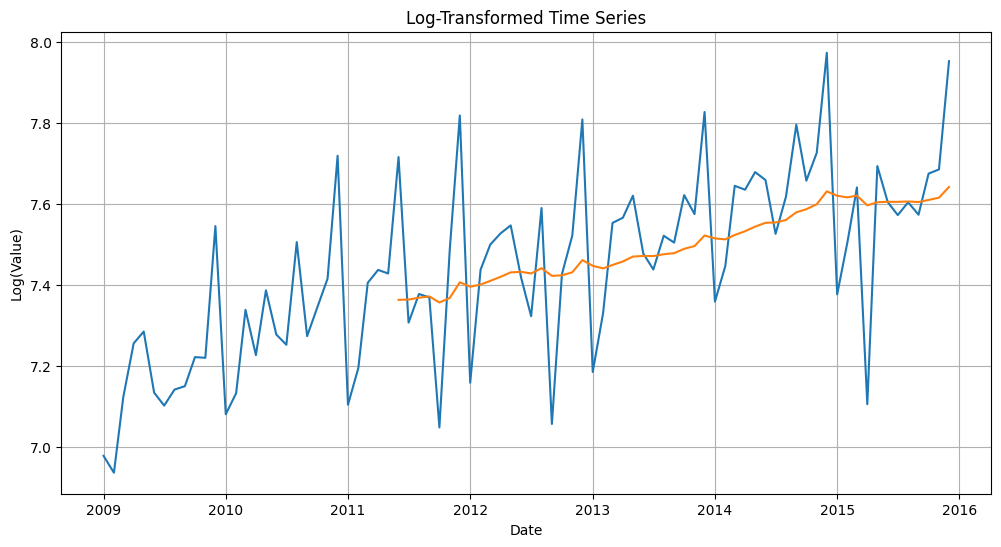

In [79]:
data_final_log = np.log(data_final.select_dtypes(include='number'))
plt.figure(figsize=(12, 6))
plt.plot(data_final_log)
plt.title("Log-Transformed Time Series")
plt.xlabel("Date")
plt.ylabel("Log(Value)")
plt.grid()
plt.show()

In [80]:
def get_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    result = adfuller(timeseries['Sales(In ThousandDollars)'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

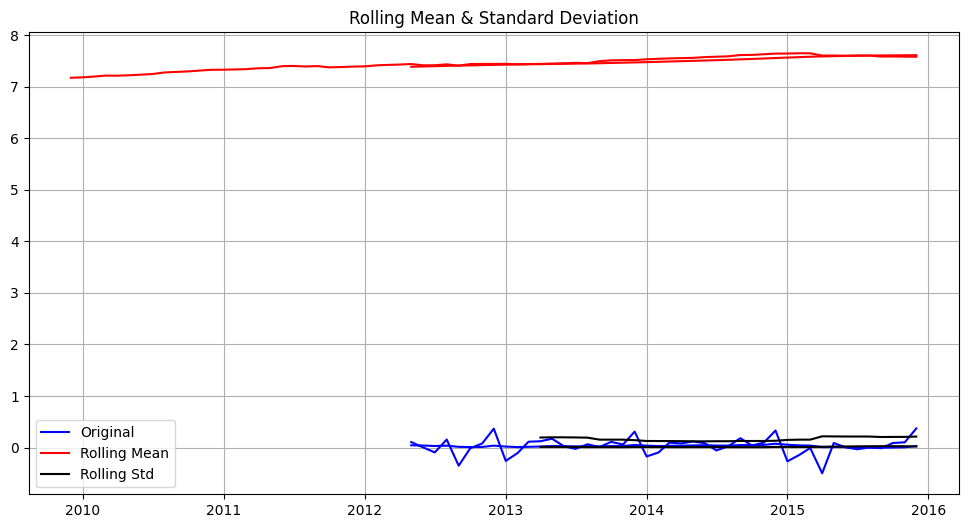

In [83]:
# 1st Method - Log transform + moving average subtraction
rolling_mean = data_final_log.rolling(window=12).mean()
data_final_log_minus_mean = data_final_log - rolling_mean
data_final_log_minus_mean.dropna(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data_final_log_minus_mean, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(data_final_log_minus_mean.rolling(window=12).std(), color='black', label='Rolling Std')

# Auto-clean legend (to remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.title('Rolling Mean & Standard Deviation')
plt.grid()
plt.show()


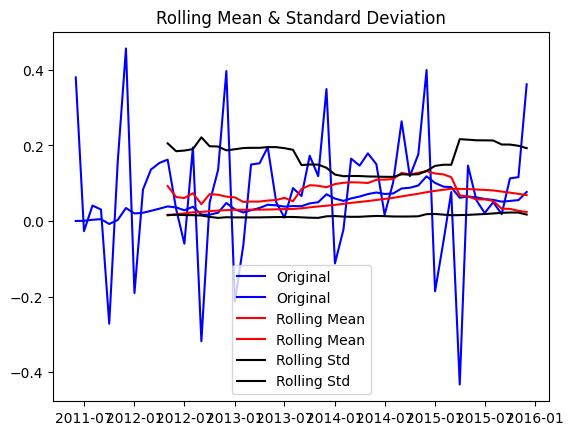

ADF Statistic: -8.318468327416262
p-value: 3.626480303368341e-13
Critical Values:
	1%: -3.55770911573439
	5%: -2.9167703434435808
	10%: -2.59622219478738


In [84]:
#2nd method
rolling_mean_exp_decay = data_final_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
data_final_log_exp_decay = data_final_log - rolling_mean_exp_decay
data_final_log_exp_decay.dropna(inplace=True)
get_stationarity(data_final_log_exp_decay)

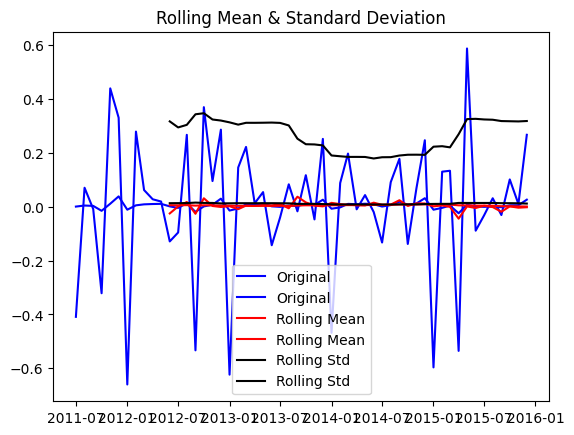

ADF Statistic: -4.623225195162393
p-value: 0.0001170189362727736
Critical Values:
	1%: -3.5925042342183704
	5%: -2.931549768951162
	10%: -2.60406594375338


In [85]:
#3rd method
data_final_log_shift = data_final_log - data_final_log.shift()
data_final_log_shift.dropna(inplace=True)
get_stationarity(data_final_log_shift)

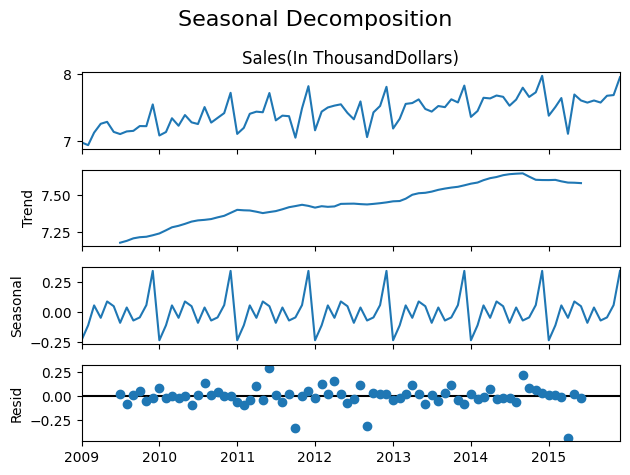

In [91]:
cleaned_series = data_final_log["Sales(In ThousandDollars)"].dropna()

# 1. Seasonal Decomposition
decomposition = seasonal_decompose(cleaned_series, model='additive', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

In [92]:
# 2. ARIMA Model Fitting
model = ARIMA(cleaned_series, order=(2, 1, 2))  # ARIMA(p,d,q)
results = model.fit()

c:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\A.Akshita\OneDrive\Desktop\CR\retail_sales_pred\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


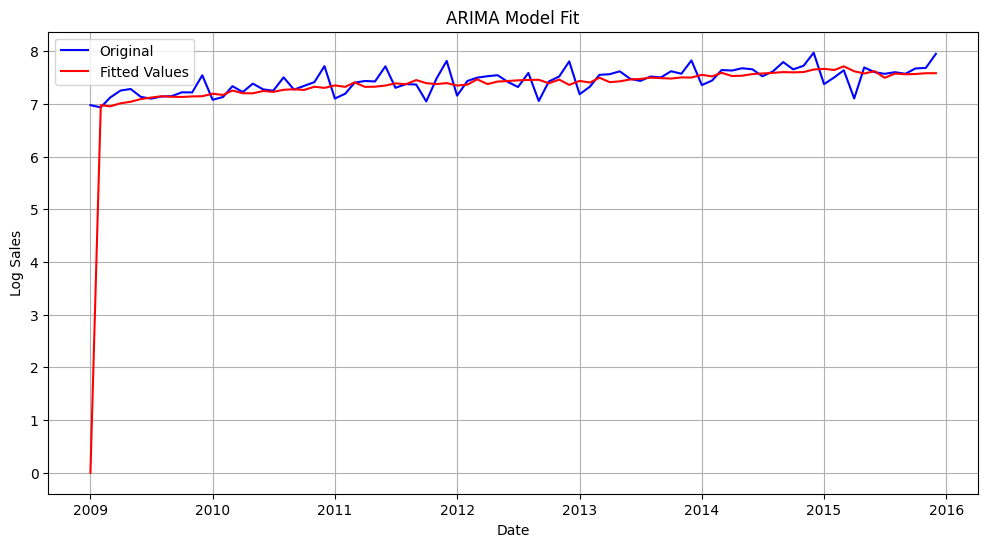

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_series, label='Original', color='blue')
plt.plot(results.fittedvalues, label='Fitted Values', color='red')
plt.title('ARIMA Model Fit')
plt.xlabel('Date')
plt.ylabel('Log Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
predictions_ARIMA = results.fittedvalues
predictions_ARIMA_exp = np.expm1(predictions_ARIMA)

# Align indexes (ARIMA fitted values usually start later due to differencing)
actual_values = data_final["Sales(In ThousandDollars)"].loc[predictions_ARIMA_exp.index]

# Compute metrics
performance_MAE = mean_absolute_error(actual_values, predictions_ARIMA_exp)
performance_MAPE = mean_absolute_percentage_error(actual_values, predictions_ARIMA_exp)

print(f"MAE: {performance_MAE:.2f}")
print(f"MAPE: {performance_MAPE:.2%}")

MAE: 242.65
MAPE: 14.03%


In [98]:
data_final = data_final.drop(columns=["Date", "Our 30-day WMA"])

## SARIMA

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
data_final 

,Sales(In ThousandDollars)
Date,
2009-01-01,1071.666667
2009-02-01,1028.000000
2009-03-01,1239.666667
2009-04-01,1415.000000
2009-05-01,1457.000000
...,...
2015-08-01,2004.666667
2015-09-01,1944.000000
2015-10-01,2151.666667


#### finding acf and pacf for checking stationary of time series data

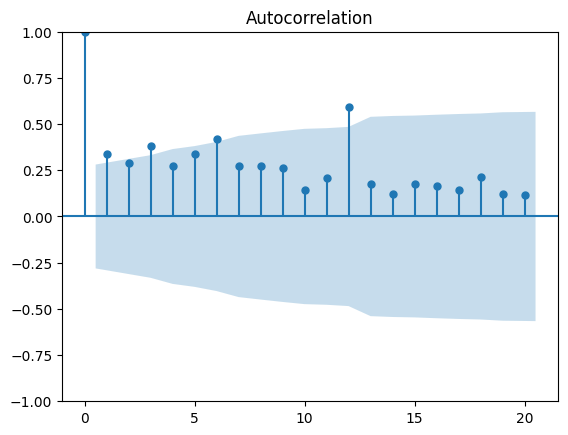

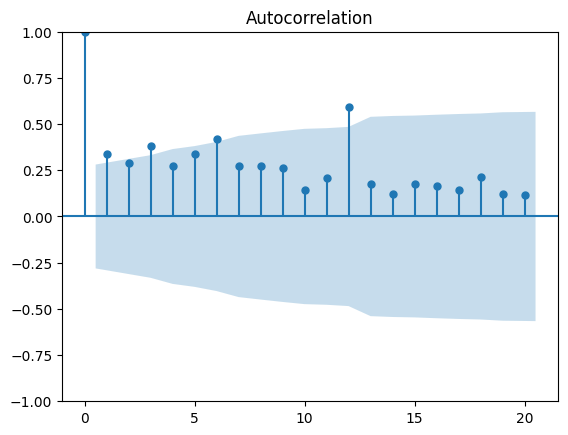

In [103]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_final['Sales(In ThousandDollars)'],lags=20,alpha=0.01)

In [104]:
data_final_df=data_final.diff()
data_final_df=data_final_df.dropna()

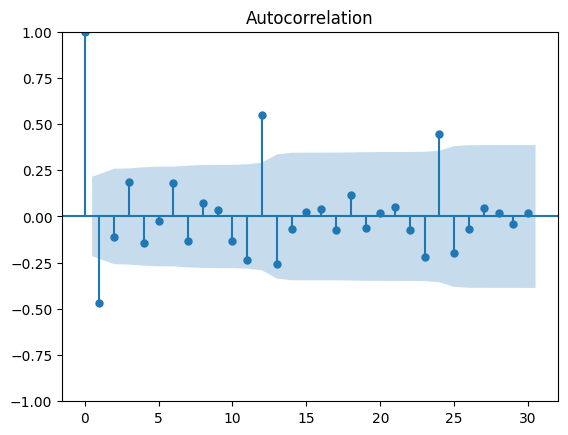

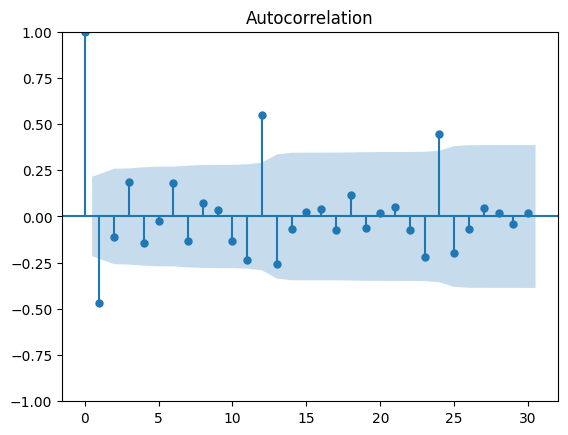

In [105]:
plot_acf(data_final_df,lags=30)

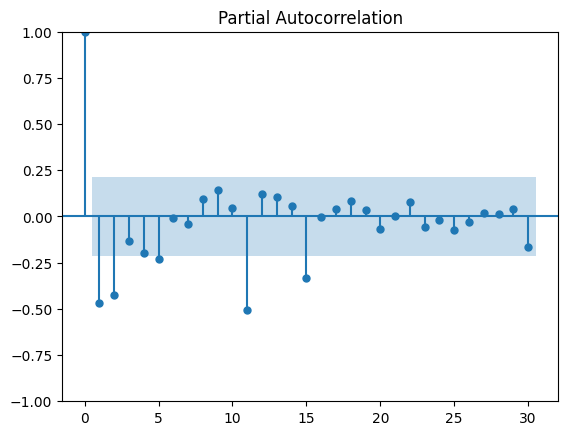

In [106]:
plot_pacf(data_final_df,lags=30)
plt.show()

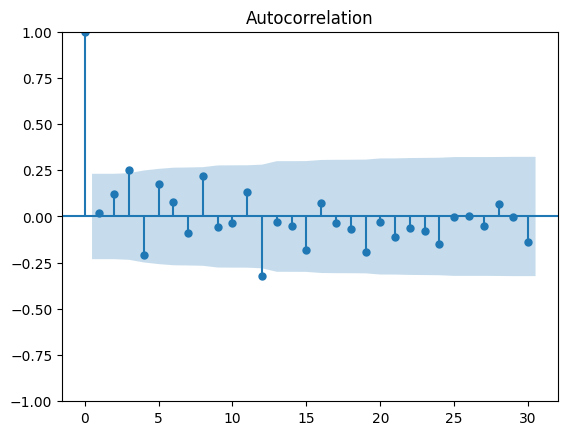

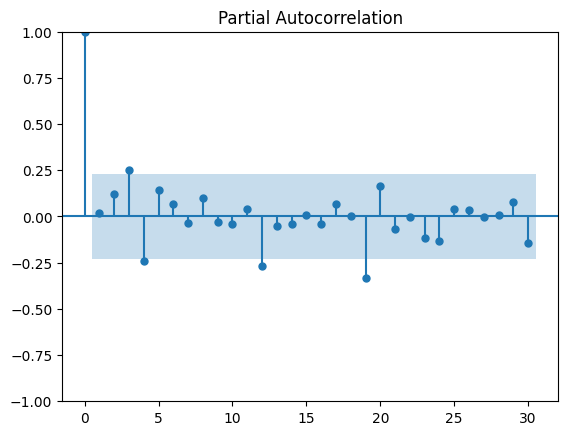

In [107]:
data_final_df=data_final.diff(12)
data_final_df=data_final_df.dropna()
plot_acf(data_final_df,lags=30)
plot_pacf(data_final_df,lags=30)
plt.show()

In [108]:
##model
import statsmodels.api as sm
mod=sm.tsa.statespace.SARIMAX(data_final,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:          Sales(In ThousandDollars)   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -392.705
Date:                            Tue, 22 Apr 2025   AIC                            795.409
Time:                                    19:22:52   BIC                            805.625
Sample:                                01-01-2009   HQIC                           799.379
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0365      0.246      0.148      0.882      -0.446       0.519
ma.L1         -1.0000     52.306   

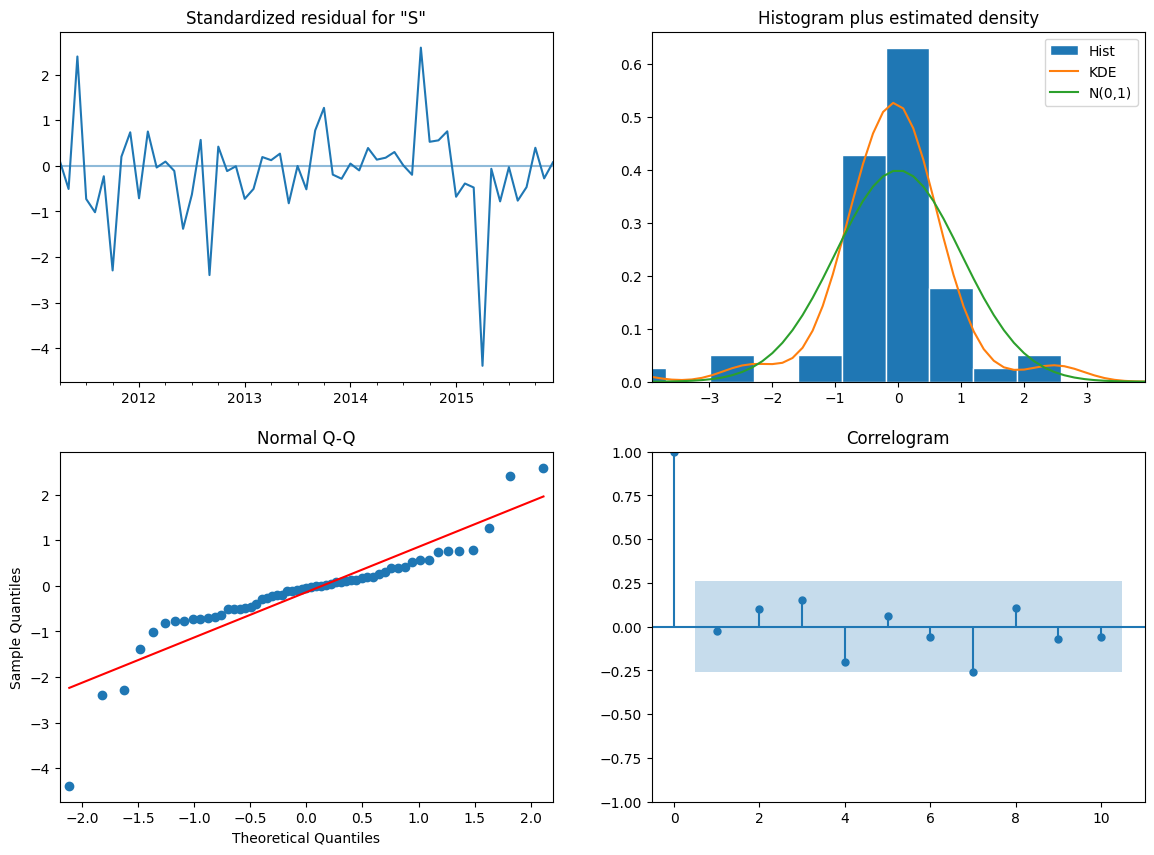

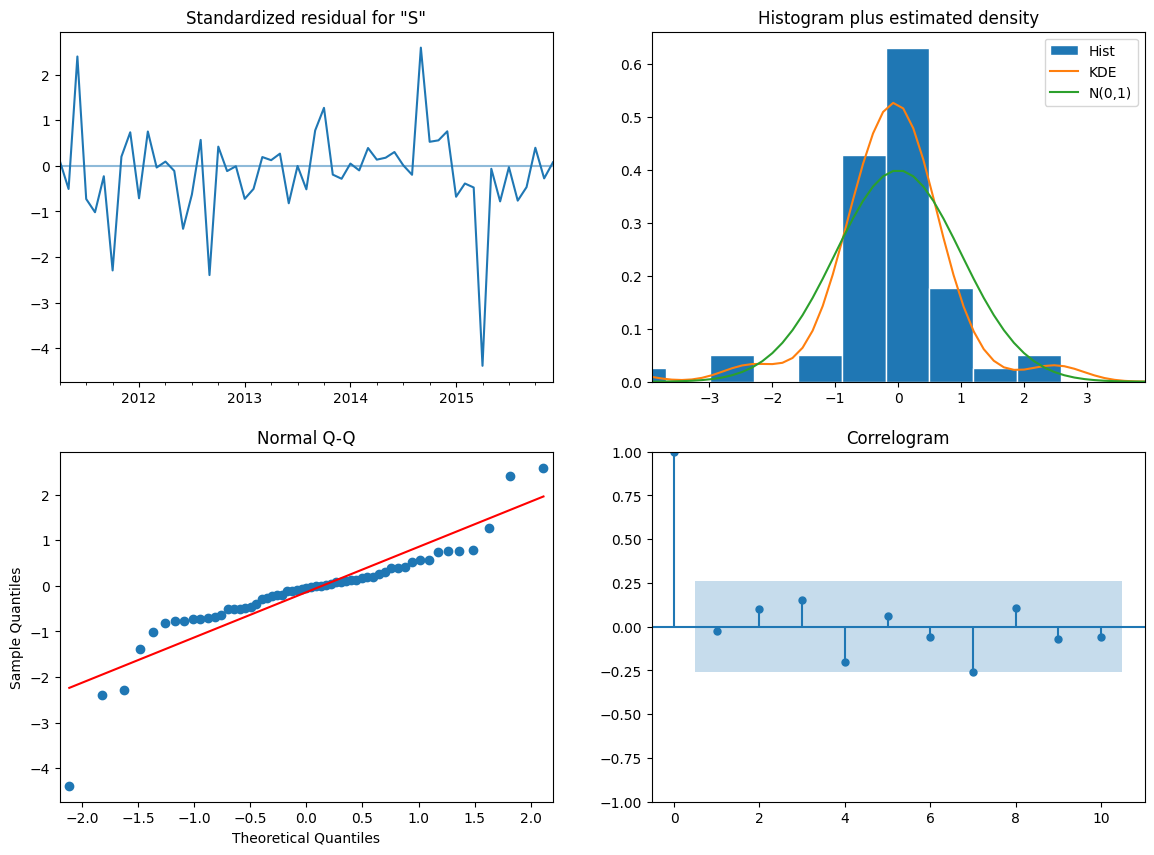

In [109]:
results.plot_diagnostics(figsize=(14,10))

In [110]:
##forecasting for future
forecast_values=results.get_forecast(steps=50)
forecast_ci=forecast_values.conf_int()

In [111]:
forecast_values=results.get_forecast(steps=12)
forecast_values.summary_frame()

Sales(In ThousandDollars),mean,mean_se,mean_ci_lower,mean_ci_upper
2016-01-01,1773.583026,223.034314,1336.443804,2210.722248
2016-02-01,1951.012226,222.217267,1515.474387,2386.550066
2016-03-01,2225.522483,222.233505,1789.952817,2661.092149
2016-04-01,2089.282318,222.229361,1653.720775,2524.843861
2016-05-01,2331.367835,222.237723,1895.789901,2766.945769
2016-06-01,2249.600420,222.258743,1813.981287,2685.219552
2016-07-01,2059.861398,222.292056,1624.176973,2495.545822
2016-08-01,2253.865176,222.337548,1818.091589,2689.638764
2016-09-01,2130.086806,222.395342,1694.199944,2565.973667
2016-10-01,2193.468288,222.465762,1757.443407,2629.493169


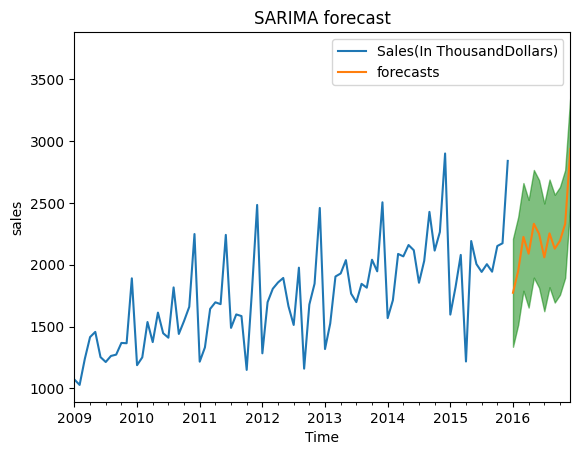

In [112]:
ax=data_final.plot()
forecast_values.predicted_mean.plot(ax=ax,label='forecasts')
ax.fill_between(forecast_ci.index,forecast_ci.iloc[:,0],forecast_ci.iloc[:,1],color='g',alpha=.5)
ax.set_xlabel('Time')
ax.set_ylabel('sales')
ax.set_title('SARIMA forecast')
plt.legend()

In [113]:
data_final

,Sales(In ThousandDollars)
Date,
2009-01-01,1071.666667
2009-02-01,1028.000000
2009-03-01,1239.666667
2009-04-01,1415.000000
2009-05-01,1457.000000
...,...
2015-08-01,2004.666667
2015-09-01,1944.000000
2015-10-01,2151.666667


## SARIMAX

In [114]:
import statsmodels.api as sm

In [115]:
model=sm.tsa.statespace.SARIMAX(data_final['Sales(In ThousandDollars)'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: xlabel='Date'>

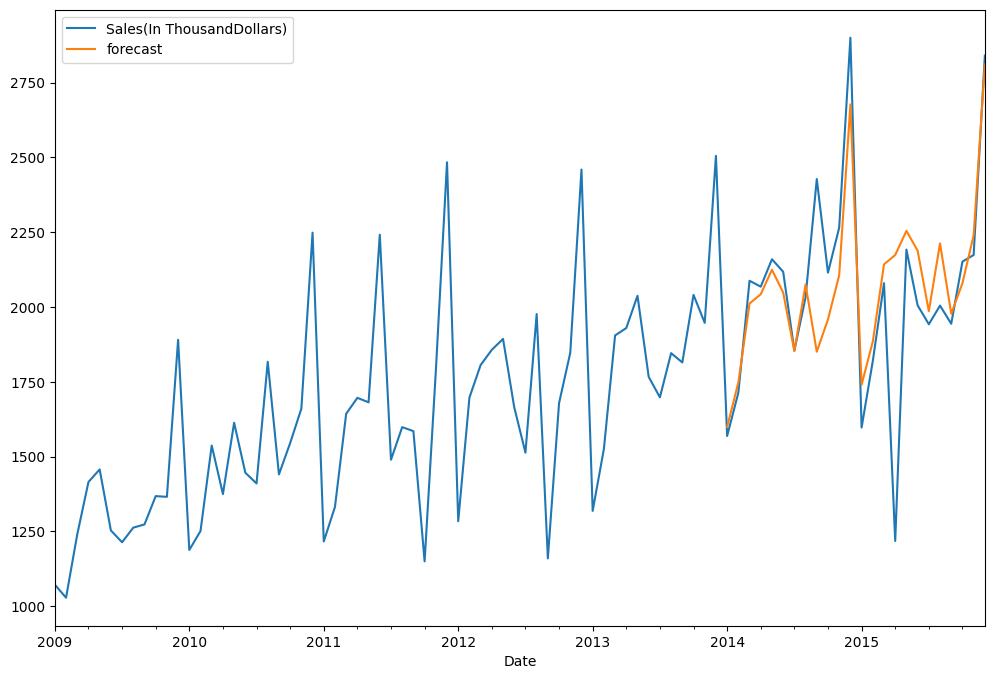

In [116]:
data_final['forecast']=results.predict(start=60,end=84,dynamic=True)
data_final[['Sales(In ThousandDollars)','forecast']].plot(figsize=(12,8))

In [117]:
test_data=data_final[60:]
data_final['forecast']=data_final['forecast'].dropna()

In [118]:
test_data.shape

(24, 2)

In [119]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Check MAE value
performance_MAE = mean_absolute_error(test_data['Sales(In ThousandDollars)'], test_data['forecast'])
print(f'The MAE for the model is {performance_MAE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(test_data['Sales(In ThousandDollars)'], test_data['forecast'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 139.81053935324528
The MAPE for the model is 0.07899796054866563


In [120]:
data_final.isna().sum()

Sales(In ThousandDollars)     0
forecast                     60
dtype: int64

## prophet

In [123]:
pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   --------- ------------------------------ 3.7/14.8 MB 24.3 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/14.8 MB 24.8 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/14.8 MB 24.8 MB/s eta 0:00:01
   --------------------------------- ------ 12.6/14.8 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 16.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [124]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly


In [125]:
from pandas import to_datetime
from prophet import Prophet
from pandas import DataFrame
from matplotlib import pyplot

In [126]:
data_final['Date'] = data_final.index

In [127]:
new_cols = ["Date","Sales(In ThousandDollars)"]
data_final=data_final[new_cols]

In [128]:

data_final.columns = ['ds', 'y']
data_final['ds']= to_datetime(data_final['ds'])

In [129]:
data_final_train=data_final[:60]
data_final_test = data_final[60:]

In [130]:
model = Prophet(interval_width=0.99, yearly_seasonality=True)
# Fit the model on the training dataset
model.fit(data_final_train)

19:33:47 - cmdstanpy - INFO - Chain [1] start processing
19:33:50 - cmdstanpy - INFO - Chain [1] done processing


In [131]:
forecast = model.predict(data_final_train)

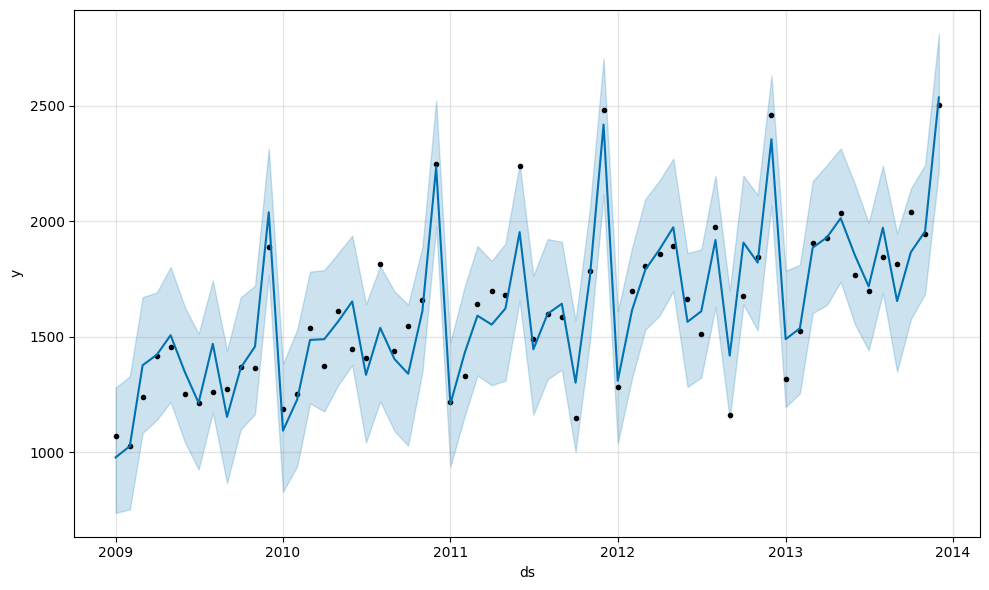

In [132]:
model.plot(forecast);

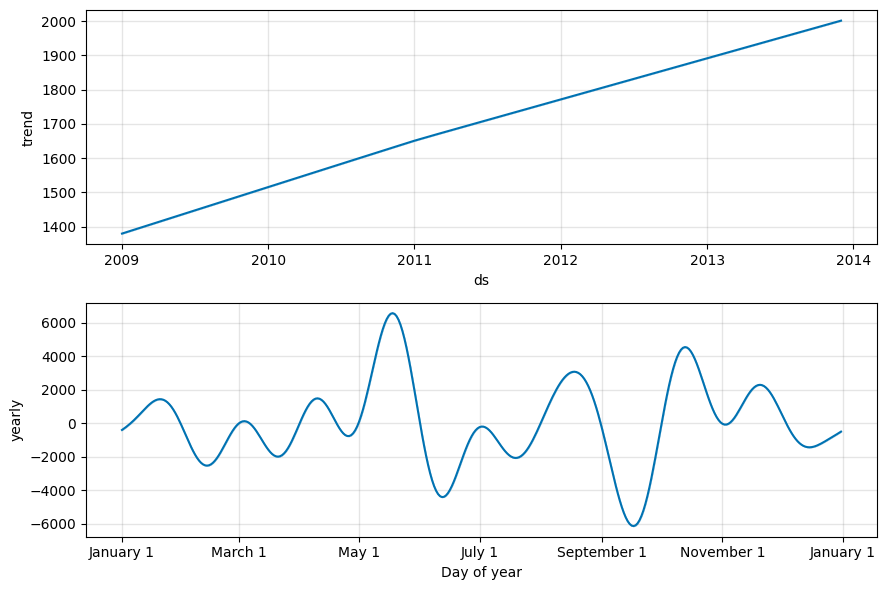

In [133]:
model.plot_components(forecast);

In [136]:
# Assuming 'df' is your original input with columns ['ds', 'y']
# and 'forecast' is the result of model.predict()

performance = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

# Merge actual y-values from original df
performance = pd.merge(performance, data_final[['ds', 'y']], on='ds', how='left')


In [137]:
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

anomaly
0    59
1     1
Name: count, dtype: int64

In [138]:
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,yhat,yhat_lower,yhat_upper,y,anomaly
19,2010-08-01,1538.720931,1219.884218,1806.192102,1816.867503,1


<Axes: xlabel='ds', ylabel='y'>

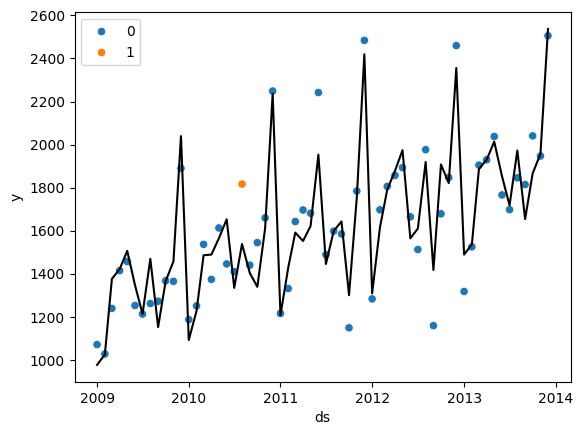

In [139]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

          ds         yhat   yhat_lower   yhat_upper
0 2014-01-01  1589.384114  1322.256632  1871.957221
1 2014-02-01  1723.242577  1443.719328  2002.974993
2 2014-03-01  1980.173260  1689.482555  2253.396199
3 2014-04-01  1981.949947  1676.576637  2267.058953
4 2014-05-01  2056.642505  1763.471367  2327.605945


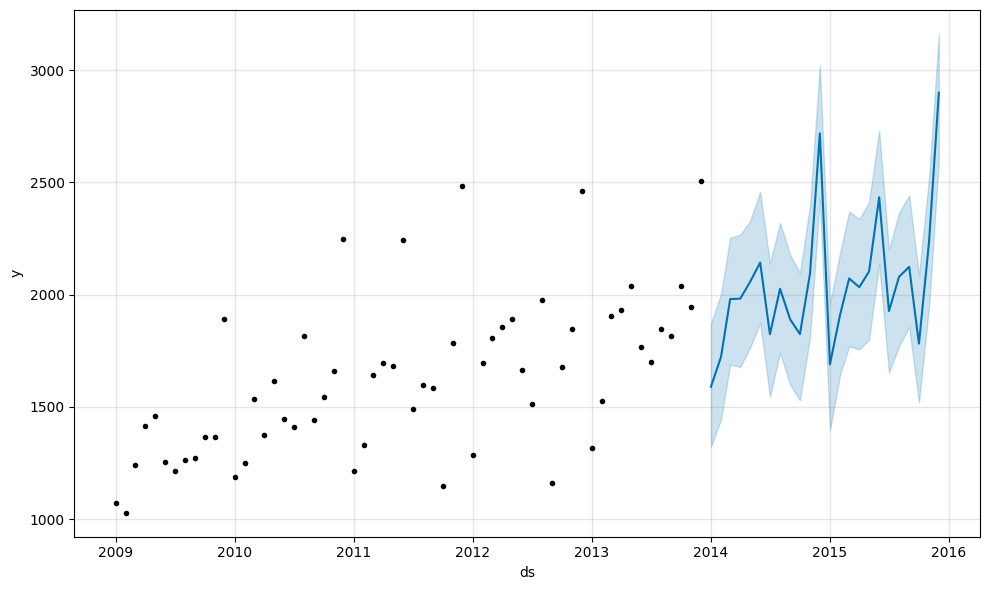

In [140]:
future = list()
for i in range(1, 13):
 date = '2014-%02d' % i
 future.append([date])
for i in range(1, 13):
 date = '2015-%02d' % i
 future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [141]:
y_true = data_final_test['y'].values
y_pred = forecast['yhat'].values

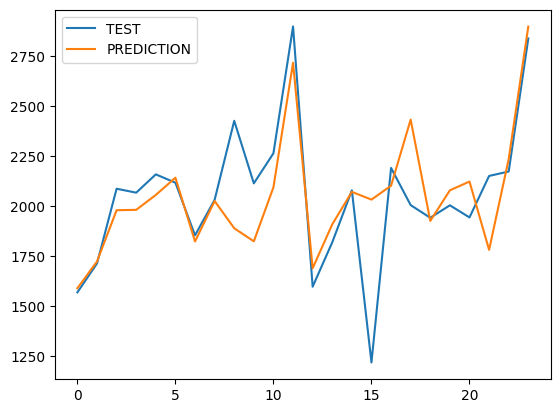

In [142]:
pyplot.plot(y_true,label='TEST')
pyplot.plot(y_pred,label='PREDICTION')
pyplot.legend()
pyplot.show()

In [144]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
performance = pd.merge(data_final_test, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 160.64311787296447
The MAPE for the model is 0.0867878954079538


## HOLTWINTERS

In [189]:
data_final

,Sales(In ThousandDollars)
Date,
2009-01-01,1071.666667
2009-02-01,1028.000000
2009-03-01,1239.666667
2009-04-01,1415.000000
2009-05-01,1457.000000
...,...
2015-08-01,2004.666667
2015-09-01,1944.000000
2015-10-01,2151.666667


In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

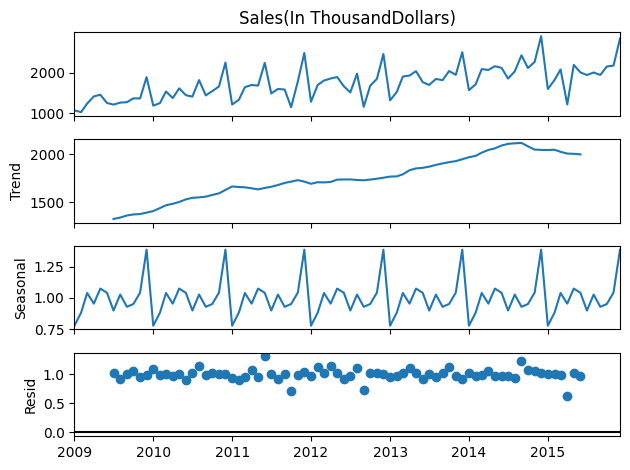

In [192]:
decompose_result = seasonal_decompose(data_final['Sales(In ThousandDollars)'],model='multiplicative')
decompose_result.plot();

In [193]:
data_final.index.freq = 'MS'

In [194]:
m = 12
alpha = 1/(2*m)

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

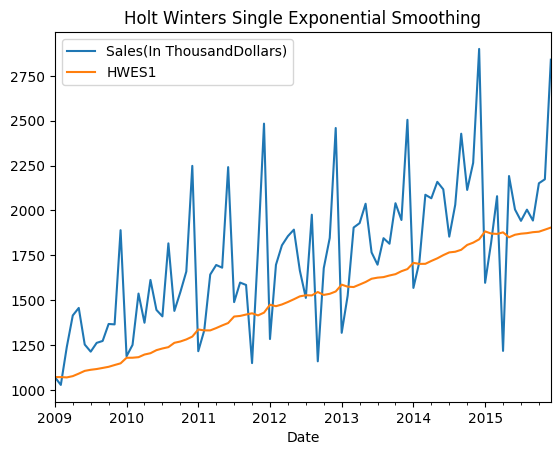

In [195]:
##single ES
data_final['HWES1'] = SimpleExpSmoothing(data_final['Sales(In ThousandDollars)']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
data_final[['Sales(In ThousandDollars)','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

<Axes: title={'center': 'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Date'>

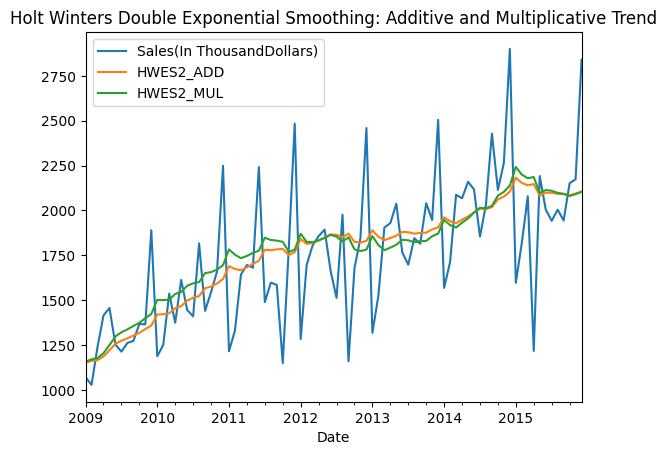

In [196]:
##double ES
data_final['HWES2_ADD'] = ExponentialSmoothing(data_final['Sales(In ThousandDollars)'],trend='add').fit().fittedvalues
data_final['HWES2_MUL'] = ExponentialSmoothing(data_final['Sales(In ThousandDollars)'],trend='mul').fit().fittedvalues
data_final[['Sales(In ThousandDollars)','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

<Axes: title={'center': 'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='Date'>

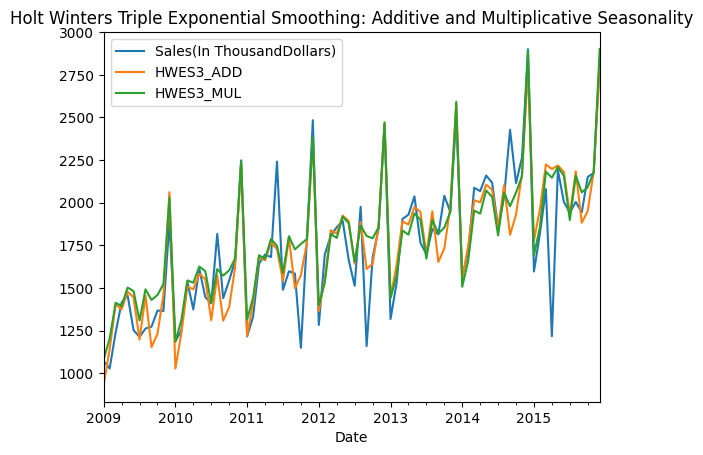

In [197]:
#triple ES
data_final['HWES3_ADD'] = ExponentialSmoothing(data_final['Sales(In ThousandDollars)'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data_final['HWES3_MUL'] = ExponentialSmoothing(data_final['Sales(In ThousandDollars)'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data_final[['Sales(In ThousandDollars)','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [198]:
##dividing data into training and testing
data_final.index.freq = 'MS'
train_data = data_final[:60]
test_data = data_final[60:]

In [199]:
test_data

,Sales(In ThousandDollars),HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
Date,,,,,,
2014-01-01,1568.666667,1708.216409,1961.686785,1947.176139,1552.612105,1507.520405
2014-02-01,1713.333333,1702.401836,1939.743026,1918.541768,1748.252822,1660.915659
2014-03-01,2087.666667,1702.857315,1929.171184,1905.049407,2015.063344,1954.158803
2014-04-01,2068.000000,1718.891038,1948.821041,1931.977183,2001.842627,1935.805134
2014-05-01,2159.666667,1733.437245,1966.168453,1955.737218,2106.200642,2072.016939
2014-06-01,2117.867503,1751.196804,1990.295329,1988.441976,2077.010444,2034.592505
2014-07-01,1854.333333,1766.474750,2010.142605,2015.201281,1847.568918,1808.491504
2014-08-01,2032.000000,1770.135524,2007.512818,2011.540110,2102.766770,2059.335544
2014-09-01,2427.867503,1781.046544,2018.751041,2026.173650,1811.787479,1979.299193


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

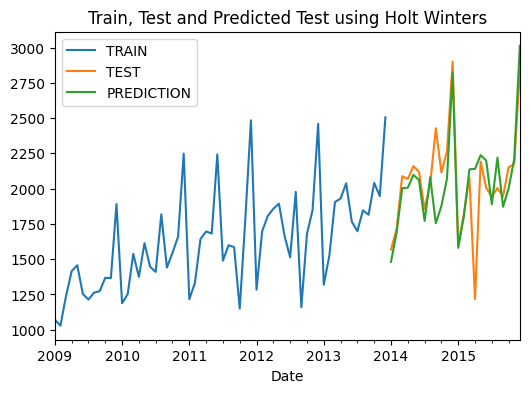

In [200]:
#fitting the model
fitted_model = ExponentialSmoothing(train_data['Sales(In ThousandDollars)'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_data['Sales(In ThousandDollars)'].plot(legend=True,label='TRAIN')
test_data['Sales(In ThousandDollars)'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<Axes: xlabel='Date'>

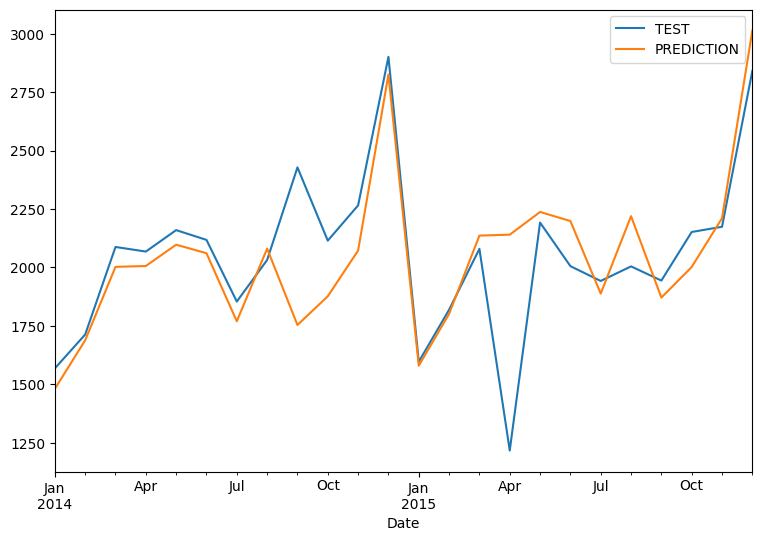

In [201]:
test_data['Sales(In ThousandDollars)'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2014-01-01','2015-12-01'])

In [202]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# Check MAE value
performance_MAE = mean_absolute_error(test_data['Sales(In ThousandDollars)'], test_predictions)
print(f'The MAE for the model is {performance_MAE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(test_data['Sales(In ThousandDollars)'], test_predictions)
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 151.82728124584173
The MAPE for the model is 0.08370194870962949
